<a href="https://colab.research.google.com/github/ysu7120/ysu7120/blob/code-study/%ED%99%98%EA%B2%BD%EB%B6%80_%EC%88%98%EC%B6%9C_%EA%B7%B8%EB%9E%98%ED%94%84_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import numpy as np
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

In [ ]:
df_d = pd.read_csv("/content/drive/MyDrive/finalpj_data/환경산업분류별(보호활동) 수출액.csv", thousands = ',', encoding='utf-8')
df_m = pd.read_csv("/content/drive/MyDrive/finalpj_data/환경산업분류별(매체별) 수출액.csv", thousands = ',', encoding='utf-8')

In [ ]:
year = ['2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년']

In [ ]:
for y in year :
    df_d = pd.read_csv("/content/drive/MyDrive/finalpj_data/환경산업분류별(매체별) 수출액.csv", thousands = ',', encoding='utf-8')
    df_d = df_d[df_d['분류.1'] == '소계'][2:]
    a = df_d[y]
    b = a.sort_values(ascending = False)
    index_list = list(b[:3].index)
    print(f"{y} TOP 3")
    for _ in index_list :
        print(df_d['분류'][_])
    print()

2012년 TOP 3
물관리
환경 지식정보감시
환경복원 및 복구

2013년 TOP 3
물관리
환경복원 및 복구
환경안전보건

2014년 TOP 3
환경 지식정보감시
환경안전보건
지속가능 환경자원

2015년 TOP 3
물관리
환경복원 및 복구
지속가능 환경자원

2016년 TOP 3
물관리
환경복원 및 복구
지속가능 환경자원

2017년 TOP 3
물관리
환경복원 및 복구
지속가능 환경자원

2018년 TOP 3
물관리
지속가능 환경자원
환경안전보건

2019년 TOP 3
물관리
지속가능 환경자원
환경안전보건

2020년 TOP 3
물관리
지속가능 환경자원
환경안전보건



In [ ]:
top3 = ['오염관리관련건설업','오염관리관련제조업','자원관리관련제조업']

In [ ]:
top_1 = df_d[df_d['분류']== top3[0]]
top_2 = df_d[df_d['분류']== top3[1]]
top_3 = df_d[df_d['분류']== top3[2]]

df = pd.concat([top_1,top_2,top_3])
df = df.reset_index()
df

,index,분류,분류.1,항목,단위,통계자료,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,20,오염관리관련건설업,소계,수출액,억원,원자료,355143.99,470296.43,198882.02,206557.88,193636.03,242412.20,240656.67,235597.25,239242.04
1,21,오염관리관련건설업,소계,환경부문 수출액,억원,원자료,32201.18,41522.73,19519.70,21129.18,21383.37,20159.03,20628.76,18884.17,19379.43
2,2,오염관리관련제조업,소계,수출액,억원,원자료,216949.14,312401.55,182835.37,179072.27,177525.74,186757.64,233456.84,229708.07,232202.20
3,3,오염관리관련제조업,소계,환경부문 수출액,억원,원자료,20569.40,12929.26,30036.89,30213.84,29325.62,28852.00,29222.42,29051.16,29453.64
4,64,자원관리관련제조업,소계,수출액,억원,원자료,582326.61,94884.26,155275.48,134537.70,126392.27,124474.40,147705.37,145034.28,147335.36
5,65,자원관리관련제조업,소계,환경부문 수출액,억원,원자료,11908.34,10752.77,15539.47,15037.23,14095.10,15870.11,15853.41,16428.02,16425.42


In [ ]:
def export_graph(x):
  df_1=df.loc[x:x+1,['2012년', '2013년', '2014년', '2015년',
       '2016년', '2017년', '2018년', '2019년', '2020년']]
  df_1=df_1.transpose()
  cost0 = df_1[x][0:9]
  cost1 = df_1[x+1][0:9]
  cost1.index = ['2012년', '2013년', '2014년', '2015년',
       '2016년', '2017년', '2018년', '2019년', '2020년']

  index = np.arange(len(cost1.index))
  plt.bar(index,cost0,label='export amount')
  plt.bar(index,cost1,label='environment')


  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.xticks(index,cost1.index)
  #plt.yticks([0, 9])

  plt.legend()
  plt.xlabel('year')
  plt.ylabel('money')
  return plt      

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

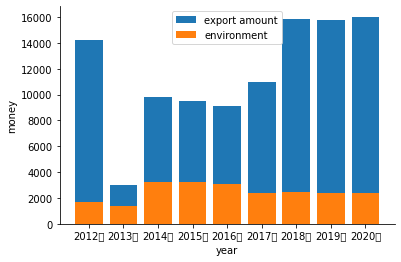

In [ ]:
# x값은 0부터 2의 배수로 입력해야함
export_graph(4)

In [ ]:
# 01 소계  23 45 67

##환경부 수출액 상위3개분야 연도별 매출

Text(0, 0.5, 'money')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)


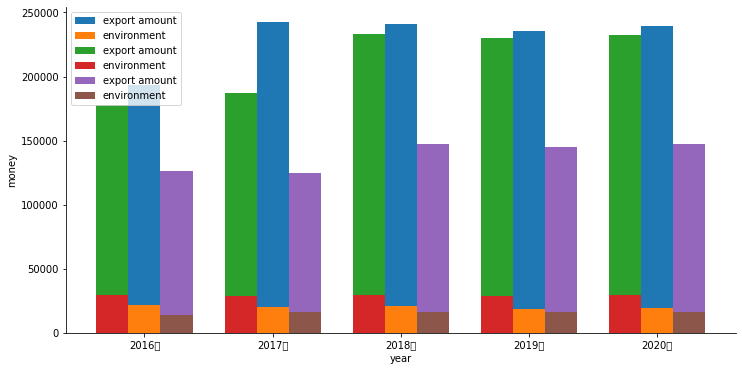

In [ ]:
#그래프 추출 범위지정
df_1=df.loc[0:5,['2016년', '2017년', '2018년', '2019년', '2020년']]
df_1=df_1.transpose()

#수출액, 환경부분수출액 2개의 막대그래프 합치기
cost0 = df_1[0][0:9]
cost1 = df_1[1][0:9]
cost1.index = ['2016년', '2017년', '2018년', '2019년', '2020년']

cost2 = df_1[2][0:9]
cost3 = df_1[3][0:9] 

cost4 = df_1[4][0:9]
cost5 = df_1[5][0:9] 

#바의 넓이, 그래프크기 지정
bar_width=0.25
fig, ax = plt.subplots(figsize=(12,6))

index = np.arange(len(cost1.index))
plt.bar(index,cost0,bar_width,label='export amount')
plt.bar(index,cost1,bar_width,label='environment')

plt.bar(index-bar_width,cost2,bar_width, label='export amount')
plt.bar(index-bar_width,cost3,bar_width, label='environment')

plt.bar(index+bar_width,cost4,bar_width, label='export amount')
plt.bar(index+bar_width,cost5,bar_width, label='environment')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(index,cost1.index)
#plt.yticks([0, 9])

plt.legend()
plt.xlabel('year')
plt.ylabel('money')  